In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import importlib
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

from os import listdir
from os.path import isfile, join
import os

In [2]:
############## Select device ################

device = 'fluxonium' # change here to change the device: charge_qubit, flopping_spin, flopping_charge, transmon, fluxonium

#############################################

data = np.load('../../data/params/'+device+'.npz', allow_pickle=True)
wq, g, kappa, dim = data['wq'], data['g'], data['kappa'], data['dim']

In [3]:
###### List available file to be plotted ########

path = '../../data/'+device

for file in os.listdir(path):
    if file.startswith("SNR_N_fock"):
        if file.endswith(".npz"):
            print(file)

#################################################

SNR_N_fock=10_N_rep_import=10_n_states=10_dim=110_num_w=101_final_t=0.5_compensation=False.npz
SNR_N_fock=8_N_rep_import=8_n_states=8_dim=110_num_w=101_final_t=0.5_compensation=False.npz


In [4]:
############# Select one set of parameters ################

dim = 110
num_w = 101
compensation = False

n_states_import = 8
N_rep_import = 8

N_fock = 8
n_states = 8

final_t = 0.5

###########################################################

In [5]:
def import_npz(npz_file):
    Data = np.load(npz_file, allow_pickle=True)
    for varName in Data:
        globals()[varName] = Data[varName]

fname = path+'/SNR_N_fock='+str(N_fock)+'_N_rep_import='+str(N_rep_import)+'_n_states='+str(n_states)\
            +'_dim='+str(dim)+'_num_w='+str(num_w)+'_final_t='+str(final_t)+'_compensation='+str(compensation)

import_npz(fname+'.npz')

(0.0, 0.01)

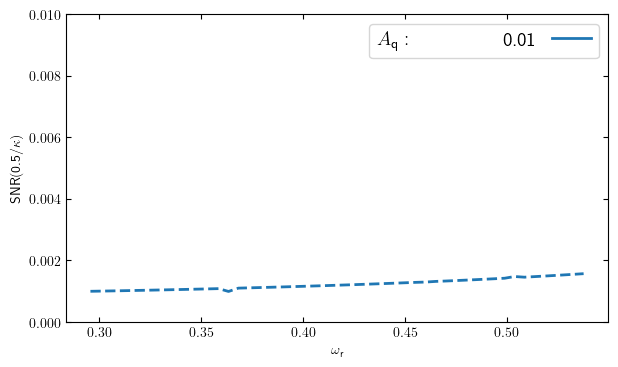

In [6]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(7,4), dpi=100)

import matplotlib.colors as mcolors
cmap = mpl.colormaps["tab10"]  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list

for idx,A in enumerate(Alist):
    ax.plot(wlist, np.real(res_an[idx,:]), label=str(np.round(A,2)), color=colors[idx], lw=2)   
    ax.plot(wlist, np.real(res_num_disp[idx,:]), color=colors[idx], lw=2, ls='--')    
    ax.scatter(wlist, np.real(res_num[idx,:]), marker='o', color=colors[idx], facecolors='none', s=40)    

ax.legend(loc='upper right')

ax.xaxis.set_tick_params(direction="in", which='both')
ax.yaxis.set_tick_params(direction="in", which='both')
ax.set_xlabel(r'$\omega_{\text{r}}$')

ax.set_ylabel(r'$\text{SNR}($'+str(final_t)+r'$/\kappa)$')
ax.tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

h, l = ax.get_legend_handles_labels() # Extracting handles and labels
ph = [plt.plot([],marker="", ls="")[0]] # Canvas
handles = ph + h
labels = [r'$A_{\text{q}}:$'] + l  # Merging labels
leg = ax.legend(handles, labels, fontsize="14", ncol=4, markerfirst=False)

ax.set_ylim([0,0.01])